In [1]:
# Configure the matplotlib graphics library and configure it to show
# figures inline in the notebook

%matplotlib inline
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np  # Import Numerical Python
from IPython.display import display, HTML  # Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
# import sys, os
# rootDir = '/path/to/arc/directory' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
# sys.path.insert(0,rootDir)
# import sys, os
# sys.path.insert(0,"..")

from arc import *  # Import ARC (Alkali Rydberg Calculator)

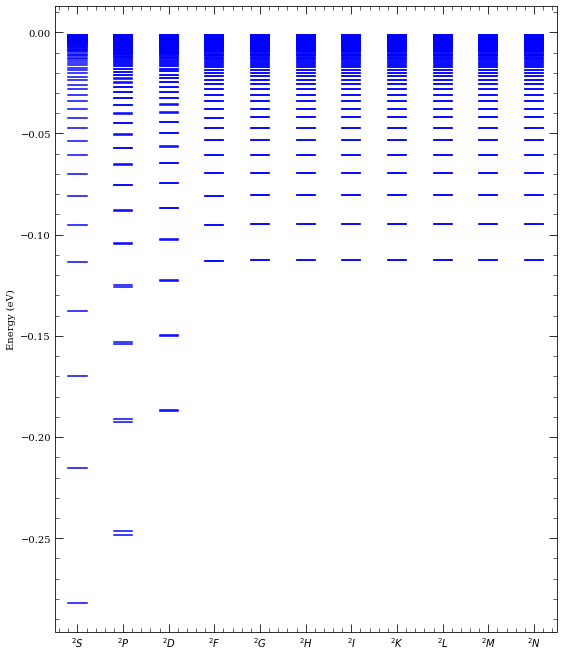

In [2]:
# Load parameters for Caesium
atom = Caesium()

nmin = 11  # Minimum n
nmax = 105  # Maximum n
lmin = 0  # Minimum l
lmax = 10  # Maxmium l

# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax)
levels.drawLevels()
levels.showPlot()
# plot is interactive when called outside the IPython notebook (e.g. from Python program)

In [20]:
import scipy.constants as sc
##test of the energy level calc from s to p --matches with 894 nm transition on nist database
evtj = 1.60218e-19
scale = evtj/sc.h*1e-12
sc_wl = sc.c*sc.h/evtj/1e-9
print('thz', (levels.atom.getEnergy(6,0,.5,.5)-levels.atom.getEnergy(6,1,.5,.5))*scale) ##specifies energy for (n,l,j,s)
print('wv', sc_wl/(levels.atom.getEnergy(6,0,.5,.5)-levels.atom.getEnergy(6,1,.5,.5)))


thz -335.1167381383232
wv -894.5911196958991


In [21]:
ematrix = [[0 for x in range((nmax-nmin+1)*2)] for y in range(nmax-nmin+1)] 
k = 0
for i in range(nmin,nmax+1):
    l = 0
    for j in range(nmin,(nmax+1)):
        ematrix[k][2*l] = abs((levels.atom.getEnergy(i,0,.5,.5)-levels.atom.getEnergy(j,1,.5,.5))*scale)
        ematrix[k][2*l+1] = abs((levels.atom.getEnergy(i,0,.5,.5)-levels.atom.getEnergy(j,1,1.5,.5))*scale)
        l = l + 1
    k = k + 1

    
cutoff = 1e-2
j2 = [[i for i in line if i < cutoff] for line in ematrix]
ematrix = np.array(ematrix)
wh = np.argwhere(ematrix < cutoff)
print(np.min(ematrix))


##unfortunately there are no states with MHz splitting at zero DC field

0.0029077997304673463


In [24]:
#lets do the same check for p-> D transitions while were at it
ematrix_pd = [[0 for x in range((nmax-nmin+1)*4)] for y in range(nmax-nmin+1)] 
k = 0
for i in range(nmin,nmax+1):
    l = 0
    for j in range(nmin,(nmax+1)):
        ematrix_pd[k][4*l] = abs((levels.atom.getEnergy(i,1,.5,.5)-levels.atom.getEnergy(j,2,1.5,.5))*scale)
        ematrix_pd[k][4*l+1] = abs((levels.atom.getEnergy(i,1,.5,.5)-levels.atom.getEnergy(j,2,2.5,.5))*scale)
        ematrix_pd[k][4*l+2] = abs((levels.atom.getEnergy(i,1,1.5,.5)-levels.atom.getEnergy(j,2,1.5,.5))*scale)
        ematrix_pd[k][4*l+3] = abs((levels.atom.getEnergy(i,1,1.5,.5)-levels.atom.getEnergy(j,2,2.5,.5))*scale)
        l = l + 1
    k = k + 1

    
cutoff = 1e-2
j2 = [[i for i in line if i < cutoff] for line in ematrix_pd]
ematrix_pd = np.array(ematrix_pd)
wh = np.argwhere(ematrix_pd < cutoff)
print(np.min(ematrix_pd))


##so there is a state with an 612 Mhz difference and 

0.0005259284334030675


In [30]:
##can we just go hard and compute every single levels energy difference?
ematrix = [[1.0 for x in range((nmax-nmin+1)*(lmax-lmin))] for y in range((nmax-nmin+1)*(lmax-lmin))]
print(len(ematrix))
print(len(ematrix[0]))

for n1 in range(nmin,nmax+1):
    for l1 in range(lmin,(lmax+1)):
        for n2 in range(nmin,nmax+1):
            for l2 in range(lmin,(lmax+1)):
                    try:
                        if n1 != n2 or l1 != l2:
                            ematrix[n1*(lmax)+l1][n2*(lmax)+l2] = abs((levels.atom.getEnergy(n1,l1,l1+.5,.5)-levels.atom.getEnergy(n2,l2,l2+.5,.5))*scale)
                    except:
                        pass

                    
cutoff = 1e-2
j2 = [[i for i in line if i < cutoff] for line in ematrix]
print(len(j2))
ematrix = np.array(ematrix)
wh = np.argwhere(ematrix < cutoff)
print(np.min(ematrix))
print('convert to mhz', np.min(ematrix)*1e6)

##hmm so this is of interest it seems there is a small level splitting even at zero field
But 

950
950
950
7.755176588309212e-07
convert to mhz 0.7755176588309213


In [50]:
cutoff = 1e-6
count = 0
for i  in range((nmax-nmin+1)*(lmax-lmin)):
    for j in range((nmax-nmin+1)*(lmax-lmin)):
        if ematrix[i,j] < cutoff:
            count += 1
            print(divmod(i,lmax),divmod(j,lmax), ematrix[i,j])
print(count)
##Hey cool to see we actuall do get some levels here they are just like l-> m transitions. It is still going to be important to calc the stark shifted levels though b/c the ion charge is going to stark shift everything

(87, 8) (87, 9) 9.781775360901726e-07
(87, 9) (87, 8) 9.781775360901726e-07
(88, 8) (88, 9) 9.452080185908227e-07
(88, 9) (88, 8) 9.452080185908227e-07
(89, 8) (89, 9) 9.137036617108235e-07
(89, 9) (89, 8) 9.137036617108235e-07
(90, 8) (90, 9) 8.835839717444387e-07
(90, 9) (90, 8) 8.835839717444387e-07
(91, 8) (91, 9) 8.547737042049946e-07
(91, 9) (91, 8) 8.547737042049946e-07
(92, 8) (92, 9) 8.272024682262391e-07
(92, 9) (92, 8) 8.272024682262391e-07
(93, 4) (93, 9) 9.98465216337741e-07
(93, 8) (93, 9) 8.008043655163201e-07
(93, 9) (93, 4) 9.98465216337741e-07
(93, 9) (93, 8) 8.008043655163201e-07
(94, 4) (94, 9) 9.669370819084311e-07
(94, 8) (94, 9) 7.755176588309212e-07
(94, 9) (94, 4) 9.669370819084311e-07
(94, 9) (94, 8) 7.755176588309212e-07
20


Found  275  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


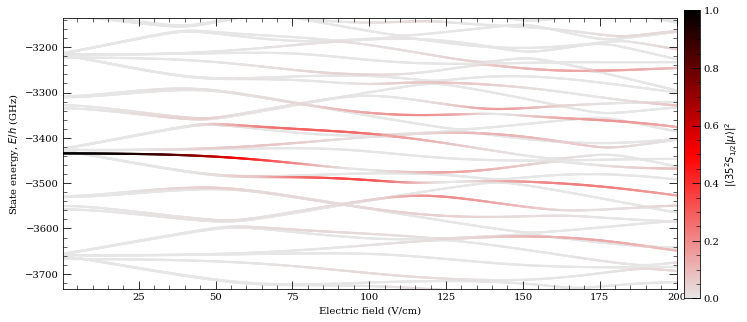

0

In [367]:
#Now we want to do the same calculation but at different DC electric fields 
##we start by making a stark map (which is not a direct perturbation theory calc but instead a basis state solver)

# Stark Map Caclulator
# ====================
# Initialise a Stark-shift Solver for Caesium
calc = StarkMap(Caesium())

# Target state
n0 = 35
l0 = 0
j0 = 0.5
mj0 = 0.5
# Define max/min n values in basis
nmax = 45
nmin = 20
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 5

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin = 25  # Min E field (V/m)
Emax = 20000  # Max E field (V/m)
N = 1000  # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True,upTo=-1)
# Show Stark Map
calc.plotLevelDiagram(progressOutput=True, units="ghz", highlightState=True)
calc.showPlot(interactive=False)
# # Return Polarizability of target state
# print(
#     "%.5f MHz cm^2 / V^2 "
#     % calc.getPolarizability(showPlot=True, minStateContribution=0.9)
# )



In [350]:
print(len(calc.composition[0][0]))

275


In [265]:

# Target state
n0 = 35
l0 = 0
j0 = 0.5
mj0 = 0.5
# Define max/min n values in basis
nmax = 40
nmin = 30
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin = 20000-10  # Min E field (V/m)
Emax = 20000.0  # Max E field (V/m)
N = 1001  # Number of Points
calc.diagonalise(np.linspace(Emin, Emax, N), progressOutput=True)
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability())
print(calc.indexOfCoupledState)

Found  410  states.
Generating matrix...
100%

Finding eigenvectors...
100%

1.74319 MHz cm^2 / V^2 
205


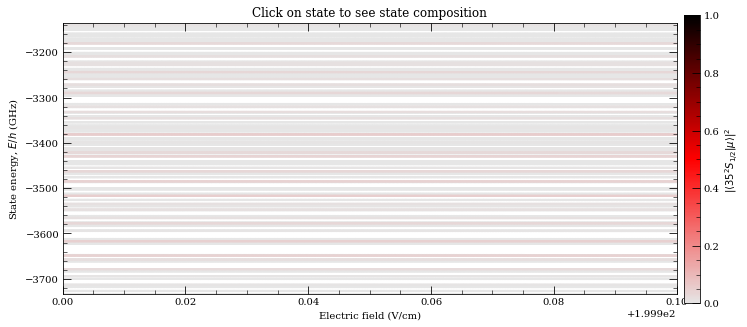

0

In [266]:
calc.plotLevelDiagram(highlightState=True,units="ghz")
calc.showPlot()

(0.0, 0.01)

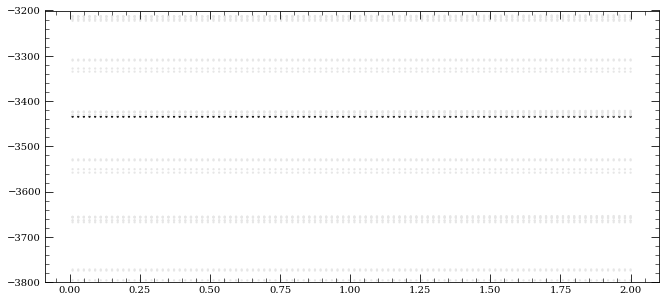

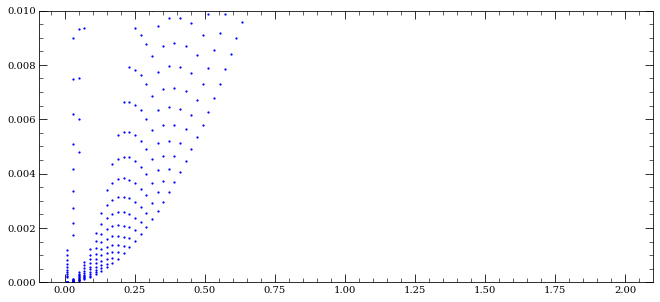

In [319]:

from scipy import constants as sc





fig, ax = plt.subplots(1, 1, figsize=(11.0, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(11.0, 5))

eFieldList = []
y = []
yState = []
diff = []
scaleFactor = 1
for br in xrange(len(calc.y)):
    for i in xrange(len(calc.y[br])-1):
        eFieldList.append(calc.eFieldList[br])
        y.append(calc.y[br][i])
        yState.append(calc.highlight[br][i])
        diff.append(calc.y[br][i+1]-calc.y[br][i])

        
diff = np.array(diff)
yState = np.array(yState)    
eFieldList = np.array(eFieldList)
y = np.array(y)
sortOrder = yState.argsort(kind="heapsort")


# eFieldList = eFieldList[sortOrder]
# y = y[sortOrder]
# yState = yState[sortOrder]



cNorm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
rvb = LinearSegmentedColormap.from_list(
            "mymap", ["0.9", "red", "black"])
cm = rvb
ax.scatter(
                eFieldList / 100,
                y * scaleFactor,
                c=yState,
                s=5,
                norm=cNorm,
                cmap=cm,
                lw=0,
                picker=5,
            )
ax.set_ylim(-3800,-3200)
ax2.scatter(
                eFieldList / 100,
                diff * scaleFactor,
                c='b',
                s=5,
                norm=cNorm,
                cmap=cm,
                lw=0,
                picker=5,
            )
ax2.set_ylim(0,.01)

In [323]:
print(calc.composition[50][0])

[[-0.9994330540686804, 0]]


In [55]:
from arc import *
num_points = 1000
calc = StarkMap(Caesium())
calc.defineBasis(41, 1.0, 0.5, 0.5,30, 45, 3)
calc.diagonalise(np.linspace(16000,18000,num_points),progressOutput=True,upTo = 6, totalContributionMax = .99999999999)
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability())


Finding eigenvectors...
100%

-3.37409 MHz cm^2 / V^2 


In [56]:
##We now want a different object that is a matrix for each electric field value

ematrix = [[[1.0 for x in range(len(calc.y[0]))] for y in range(len(calc.y[0]))] for e in range(len(calc.y))]
scale =1
e = len(calc.y)
n = len(calc.y[0])
for ef in range(0,e-1):
    for n1 in range(0,n-1):
        for n2 in range(0,n-1):
            try:
                if n1 != n2:
                    ematrix[ef][n1][n2] = abs((calc.y[ef][n1]-calc.y[ef][n2])*scale)
            except Exception as e:
                print(e)

                    
cutoff = 1e-2
ematrix = np.array(ematrix)
wh = np.argwhere(ematrix < cutoff)
print(np.min(ematrix))
print('convert to mhz', np.min(ematrix)*1e3)
##hmm so this is of interest it seems there is a small level splitting even at zero field

0.045697966859279404
convert to mhz 45.697966859279404


In [57]:
quantum_states = calc.basisStates

cutoff = 1e-2
count = 0
for k in range(e):
    for i  in range(n):
        for j in range(n):
            if ematrix[k,i,j] < cutoff:
                count += 1
                #print(i,j, ematrix[k,i,j])
                
                
print(count)
##so we are getting the transition energies now, but we don't have a clean way of backing out the labels of these states, 

0


In [58]:
quantum_states = calc.basisStates
cutoff = 1e-1
count = 0
e_fields = calc.eFieldList  # Electric fields applied in V/m

print(n,e)
for k in range(e-1):
    for i  in range(n-1):
        for j in range(n-1):
            if ematrix[k,i,j] < cutoff:
                comp1 = calc.composition[k][i]
                comp2 = calc.composition[k][j]
                for index in comp1:
                    state1 = quantum_states[index[1]]
                    for index2 in comp2:
                        state2 = quantum_states[index2[1]]
                        if int(abs(state1[1]-state2[1])) == 1.0:
                            if index[0]**2>.1 and index2[0]**2>.1 and state1[1] <= 1:
                                count += 1 
                                print(state1[1])
                                n3, l3, j3, mj3 = state1  # Example state tuple
                                n2, l2, j2, mj2 = state2  # Example state tuple
                                print(e_fields[k])
                                print(i,j,k,ematrix[k,i,j],index[0],index2[0],state1,state2)
                                print(f"  Energy: {ematrix[k,i,j]*1e3} MHz, State: n={n3}, l={l3}, j={j3},  m={mj3}, k={k}")
                                print(f"  Energy: {ematrix[k,i,j]*1e3} MHz, State: n={n2}, l={l2}, j={j2}, m={mj2}, k={k}")

print(count)
##so we are getting the transition energies now, but we don't have a clean way of backing out the labels of these states, 

105 1000
1
17053.053053053052
40 41 526 0.09331843580594068 0.3828856011204809 0.32510483803925916 [35, 1, 1.5, 0.5] [37, 2, 1.5, 0.5]
  Energy: 93.31843580594068 MHz, State: n=35, l=1, j=1.5,  m=0.5, k=526
  Energy: 93.31843580594068 MHz, State: n=37, l=2, j=1.5, m=0.5, k=526
1
17053.053053053052
40 41 526 0.09331843580594068 0.3828856011204809 -0.3222243924976381 [35, 1, 1.5, 0.5] [34, 2, 1.5, 0.5]
  Energy: 93.31843580594068 MHz, State: n=35, l=1, j=1.5,  m=0.5, k=526
  Energy: 93.31843580594068 MHz, State: n=34, l=2, j=1.5, m=0.5, k=526
1
17055.055055055054
40 41 527 0.07820541620503718 0.3826622487244542 -0.33118746897180074 [35, 1, 1.5, 0.5] [34, 2, 1.5, 0.5]
  Energy: 78.20541620503718 MHz, State: n=35, l=1, j=1.5,  m=0.5, k=527
  Energy: 78.20541620503718 MHz, State: n=34, l=2, j=1.5, m=0.5, k=527
1
17055.055055055054
40 41 527 0.07820541620503718 0.3826622487244542 0.32010086902893564 [35, 1, 1.5, 0.5] [37, 2, 1.5, 0.5]
  Energy: 78.20541620503718 MHz, State: n=35, l=1, j=1.5,

In [ ]:
from arc import Cesium, StarkMap

# Define the cesium atom
atom = Cesium()

# Define StarkMap instance for cesium
calc = StarkMap(atom)

# Choose principal quantum number n for Rydberg states (you may adjust n based on results)
n0 = 35
l0 = 0
j0 = 0.5
mj0 = 0.5
# Define max/min n values in basis
nmax = 40
nmin = 20
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax = 5

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)
num_points = 1000
calc.diagonalise(np.linspace(25.,20000,num_points),progressOutput=True,upTo = -1)

# Sweep the electric field and calculate energy levels (in GHz)
electric_fields = calc.eFieldList  # Electric fields applied in V/m
energy_levels = calc.y  # Stark shifted energy levels in GHz

# Find transitions in 1-10 MHz range
desired_transition_freq_range = (1e-3, 10e-3)  # in GHz (since 1 MHz = 1e-3 GHz)
for i, e_field in enumerate(electric_fields):
    energy_composition = calc.composition[i]  # Composition of states for each eigenvalue

    for j, energy1 in enumerate(energy_levels[i]):
        # Find the dominant basis state for this eigenstate via calc.composition
        composition1 = energy_composition[j]
        dominant_basis_index1 = int(max(composition1, key=lambda x: abs(x[1]))[0])
        state1 = quantum_states[dominant_basis_index1]  # Quantum numbers for first state
        l1 = state1[1]  # Angular momentum quantum number for state1

        for k, energy2 in enumerate(energy_levels[i]):
            if j != k:
                # Find the dominant basis state for the second eigenstate
                composition2 = energy_composition[k]
                dominant_basis_index2 = int(max(composition2, key=lambda x: abs(x[1]))[0])
                state2 = quantum_states[dominant_basis_index2]  # Quantum numbers for second state
                l2 = state2[1]  # Angular momentum quantum number for state2

                # Check that this is an l=0 to l=1 transition
                if (l1 == 0 and l2 == 1) or (l1 == 1 and l2 == 0):
                    transition_freq = abs(energy1 - energy2)
                    if desired_transition_freq_range[0] <= transition_freq <= desired_transition_freq_range[1]:
                        print(f"\nElectric Field: {e_field} V/m")
                        print(f"  Transition: {energy1:.6f} GHz -> {energy2:.6f} GHz")
                        print(f"  Frequency: {transition_freq * 1e3:.2f} MHz")
                        print(f"  State 1: n={state1[0]}, l={state1[1]}, j={state1[2]}, m={state1[3]}")
                        print(f"  State 2: n={state2[0]}, l={state2[1]}, j={state2[2]}, m={state2[3]}\n")

Found  220  states.
Generating matrix...
100%

Finding eigenvectors...
100%

